In [244]:
import json
import requests
# from pattern import web
from bs4 import BeautifulSoup


## Find and print the movie titles, list of genres, runtime and score of all movies on this page:

http://www.imdb.com/search/title?at=0&sort=num_votes,desc&start=1&title_type=feature&year=1950,2012

Inspect the CSS/HTML structure of the file.

### There are two ways of making `GET` requests

- Explicit URL
- Base URL with `GET` dictionary

### 1.) Explicit `URL`

In [12]:
data_url = 'http://www.imdb.com/search/title?at=0&sort=num_votes,desc&start=1&title_type=feature&year=1950,2012'

r = requests.get(data_url)
r.url

u'http://www.imdb.com/search/title?at=0&sort=num_votes,desc&start=1&title_type=feature&year=1950,2012'

### 2.) Base `URL` with `GET` dictionary

In [237]:
base_url = 'http://www.imdb.com/search/title'

# construct the parameter arguments
params = dict(params='num_votes,desc', start=1, title_type='feature', year='1950,2012')

# requests.get(url, params=None, **kwargs) 
r = requests.get(base_url, params=params)

r.url


'http://www.imdb.com/search/title?title_type=feature&start=1&year=1950%2C2012&params=num_votes%2Cdesc'

## Using `Pattern`

In [46]:
# Selection in pattern follows the rule of CSS

dom = web.Element(r.text)

for movie in dom.by_tag('td.title')[:10]:
    title = movie.by_tag('a')[0].content
    genres = movie.by_tag('span.genre')[0].by_tag('a')
    genres = [g.content for g in genres]
    runtime = movie.by_tag('span.runtime')[0].content
    rating = movie.by_tag('span.value')[0].content
    print(title, genres, runtime, rating)
    
    

(u'Hocus Pocus', [u'Comedy', u'Family', u'Fantasy'], u'96 mins.', u'6.7')
(u'Back to the Future', [u'Adventure', u'Comedy', u'Sci-Fi'], u'116 mins.', u'8.5')
(u'Star Wars', [u'Action', u'Adventure', u'Fantasy', u'Sci-Fi'], u'121 mins.', u'8.7')
(u'Halloween', [u'Horror', u'Thriller'], u'91 mins.', u'7.9')
(u'The Addams Family', [u'Comedy', u'Fantasy'], u'99 mins.', u'6.8')
(u'The Rocky Horror Picture Show', [u'Comedy', u'Musical'], u'100 mins.', u'7.4')
(u'Back to the Future Part II', [u'Adventure', u'Comedy', u'Sci-Fi'], u'108 mins.', u'7.8')
(u'Skyfall', [u'Action', u'Adventure', u'Thriller'], u'143 mins.', u'7.8')
(u'The Nightmare Before Christmas', [u'Animation', u'Family', u'Fantasy', u'Musical'], u'76 mins.', u'8.0')
(u'Star Wars: Episode I - The Phantom Menace', [u'Action', u'Adventure', u'Fantasy', u'Sci-Fi'], u'136 mins.', u'6.5')


## Using `BeautifulSoup`

In [6]:
for movie in bs.findAll('td', 'title')[:10]:
    title = movie.find('a').contents[0]
    genres = movie.find('span', 'genre').findAll('a')
    genres = [g.contents[0] for g in genres]
    runtime = movie.find('span', 'runtime').contents[0]
    rating = movie.find('span', 'value').contents[0]
    print(title, genres, runtime, rating)

Star Wars ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'] 121 mins. 8.7
The Wiz ['Adventure', 'Family', 'Fantasy', 'Musical'] 134 mins. 5.2
Home Alone ['Comedy', 'Family'] 103 mins. 7.4
Star Wars: Episode I - The Phantom Menace ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'] 136 mins. 6.5
How the Grinch Stole Christmas ['Comedy', 'Family', 'Fantasy'] 104 mins. 6.0
The Hunger Games ['Adventure', 'Drama', 'Sci-Fi', 'Thriller'] 142 mins. 7.3
Elf ['Comedy', 'Family', 'Fantasy', 'Romance'] 97 mins. 6.9
Love Actually ['Comedy', 'Drama', 'Romance'] 135 mins. 7.7
Rocky ['Drama', 'Sport'] 119 mins. 8.1
Star Wars: Episode III - Revenge of the Sith ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'] 140 mins. 7.7


In [246]:
movie_soup = BeautifulSoup(r.content, 'lxml')



## `BeautifulSoup` Website scraping

In [86]:
site_url = "http://www.crummy.com/software/BeautifulSoup/"

r = requests.get(site_url)

soup = BeautifulSoup(r.text, 'lxml')


In [74]:
# # check if the word 'Alice' is on the page.
'Alice' in soup 

False

In [96]:
# soup ONLY accept TAGS
soup.findAll('alien video games')

[]

In [113]:
# FindAll returns a list of all appearance of the tag
links = soup.findAll('a')

links[:7]

[<a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="http://www.candlemarkandgleam.com/shop/constellation-games/"><i>Constellation
 Games</i>, my sci-fi novel about alien video games</a>]

### Extract only the `links` - We have `bookmarks links` and `external links` in the `URL`

In [134]:
# Get all the links (both internal bookmarks and external)  
url_nlinks = [lnx.get('href') for lnx in soup.findAll('a')]

# Get ONLY external links
# List comprehensions: 
# external_links = [lnx for lnx in url_nlinks if (lnx != None) and ('http' in lnx)]

# url_nlinks[:5]

external_links = []
for lnx in url_nlinks:
    if (lnx is not None) and lnx.startswith('http'):
        external_links.append(lnx)


len(external_links)




26

In [114]:
'http' in 'http://www.crummy.com/software/BeautifulSoup/'

True

## Parsing the Tree

In [135]:
# redifining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3>
<p>Hello world!</p></body></html>"""

In [139]:
# Ge tbs4 object
tree = BeautifulSoup(s, 'lxml')
tree

<!DOCTYPE html>
<html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>

In [145]:
# Get HTML root node
root_node = tree.html
root_node

<html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>

In [146]:
# Get head from root using contents
head = tree.contents[0]
head

'html'

In [148]:
# Get body from root
body = root_node.contents[1]
body

<body><h3> Test </h3><p>Hello world!</p></body>

In [149]:
# or , directly access body
tree.body

<body><h3> Test </h3><p>Hello world!</p></body>

## Find the h3 tag by parsing the tree starting at body

In [163]:
soup.findAll('h3')[0].contents

['Beautiful Soup 3']

### Create a list of all Hall of Fame entries listed on the Beautiful Soup webpage

In [229]:
hall_of_fame = soup.findAll('ul')

hall_of_fame[0]

<ul>
<li><a href="http://www.nytimes.com/2007/10/25/arts/design/25vide.html">"Movable
 Type"</a>, a work of digital art on display in the lobby of the New
 York Times building, uses Beautiful Soup to scrape news feeds.

</li><li>Reddit uses Beautiful Soup to <a href="https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py">parse
a page that's been linked to and find a representative image</a>.

</li><li>Alexander Harrowell uses Beautiful Soup to <a href="http://www.harrowell.org.uk/viktormap.html">track the business
 activities</a> of an arms merchant.

</li><li>The developers of Python itself used Beautiful Soup to <a href="http://svn.python.org/view/tracker/importer/">migrate the Python
bug tracker from Sourceforge to Roundup</a>.

</li><li>The <a href="http://www2.ljworld.com/">Lawrence Journal-World</a>
uses Beautiful Soup to <a href="http://www.b-list.org/weblog/2010/nov/02/news-done-broke/">gather
statewide election results</a>.

</li><li

## Singular Value Decomposition

In [271]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(99)

mean = [0,0]
cov = [[1.0, 0.7], [0.7, 1.0]]

In [308]:
x, y = np.random.multivariate_normal(mean, cov, 350).T

(-4.0, 4.0, -4.0, 4.0)

/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



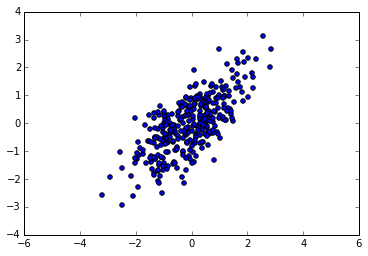

In [309]:
plt.scatter(x,y)
plt.axis('equal')

In [282]:
# Create a data matrix
matrix = np.column_stack((x,y))

# Compute SVD
U, s, Vh = sp.linalg.svd(matrix)

# 

In [311]:
S = sp.linalg.diagsvd(s,350,2)

